In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

HCP_DIR = "./hcp"
# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 339

# The data have already been aggregated into ROIs from the Glasser parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in seconds

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated twice in each subject
N_RUNS = 2
regions = np.load(f"{HCP_DIR}/regions.npy").T
region_info = dict(
    name=regions[0].tolist(),
    network=regions[1],
    hemi=['Right']*int(N_PARCELS/2) + ['Left']*int(N_PARCELS/2),
)

In [8]:
betasWin1 = np.load('betasRun2Loss.npy')
betasLoss1 = np.load('betasRun2Win.npy')

betasWin0 = np.load('betasWinNumpyRzero.npy')
betasLoss0 = np.load('betasLossNumpyrRzero.npy')

In [9]:
NumberofSubjects = 339
one0 = np.ones(NumberofSubjects)
zero0 = np.zeros(NumberofSubjects)
one1 = np.ones(NumberofSubjects)
zero1 = np.zeros(NumberofSubjects)

In [10]:
import math
subjectsTrainforWins = math.floor(NumberofSubjects*0.8) 
subjectsTrainforLoss = subjectsTrainforWins
X_trainWins1 = betasWin1[:subjectsTrainforWins]
y_trainWins1 = one1[:subjectsTrainforWins]

X_testWins1 = betasWin1[subjectsTrainforWins:]
y_testWins1 = one1[subjectsTrainforWins:]


X_trainLoss1 = betasLoss1[:subjectsTrainforLoss]
y_trainLoss1 = zero1[:subjectsTrainforLoss]

X_testLoss1 = betasLoss1[subjectsTrainforLoss:]
y_testLoss1 = zero1[subjectsTrainforLoss:]





X_train1 = np.concatenate((X_trainWins1,X_trainLoss1))

y_train1 = np.concatenate((y_trainWins1,y_trainLoss1))

X_test1 = np.concatenate((X_testWins1,X_testLoss1))
y_test1 = np.concatenate((y_testWins1,y_testLoss1))

#####################################################################

X_trainWins0 = betasWin0[:subjectsTrainforWins]
y_trainWins0 = one0[:subjectsTrainforWins]

X_testWins0 = betasWin0[subjectsTrainforWins:]
y_testWins0 = one0[subjectsTrainforWins:]


X_trainLoss0 = betasLoss0[:subjectsTrainforLoss]
y_trainLoss0 = zero0[:subjectsTrainforLoss]

X_testLoss0 = betasLoss0[subjectsTrainforLoss:]
y_testLoss0 = zero0[subjectsTrainforLoss:]





X_train0 = np.concatenate((X_trainWins0,X_trainLoss0))

y_train0 = np.concatenate((y_trainWins0,y_trainLoss0))

X_test0 = np.concatenate((X_testWins0,X_testLoss0))
y_test0 = np.concatenate((y_testWins0,y_testLoss0))


###################################################################################3

X_train = np.concatenate((X_train0 , X_train1))
X_test = np.concatenate((X_test0 , X_test1))

y_train = np.concatenate((y_train0 , y_train0))
y_test = np.concatenate((y_test0 , y_test1))


print(f'X_train shape is {X_train.shape}\nX_test shape is {X_test.shape} \ny_train shape is {y_train.shape} \ny_test shape is {y_test.shape}')

X_train shape is (1084, 360)
X_test shape is (272, 360) 
y_train shape is (1084,) 
y_test shape is (272,)


In [22]:
np.save('X_trainNN.npy' , X_train)
np.save('X_testNN.npy' , X_test)
np.save('y_trainNN.npy' , y_train)
np.save('y_testNN.npy' , y_test)


In [11]:
scaler_X = StandardScaler()
f_transformer = scaler_X.fit(X_train)

X_train = f_transformer.transform(X_train)
X_test = f_transformer.transform(X_test)

In [16]:
logisticRegr = LogisticRegression(max_iter = 3000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [17]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.7205882352941176


<BarContainer object of 10 artists>

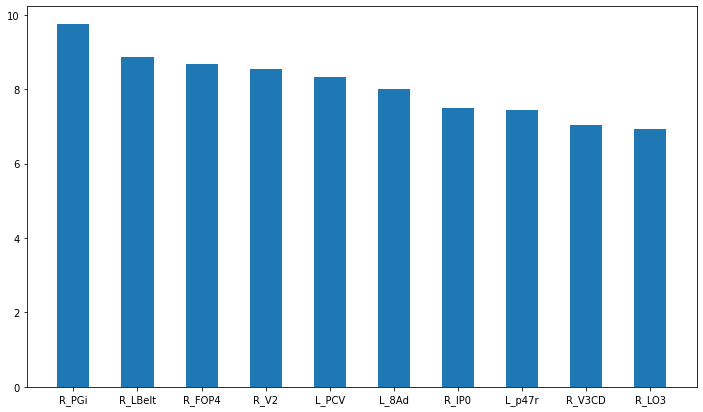

In [18]:
weights = np.ravel(logisticRegr.coef_)
weights = weights*10
regionsWights = regions[0]

indices = (-weights).argsort()[:10]
plt.figure(figsize = (12,7))

plt.bar(regionsWights[indices] , weights[indices], width =0.5)



In [19]:
regions[1][indices]

array(['Posterior-Mu', 'Auditory', 'Cingulo-Oper', 'Visual2',
       'Dorsal-atten', 'Posterior-Mu', 'Language', 'Frontopariet',
       'Visual2', 'Visual2'], dtype='<U12')

In [20]:
predictions = logisticRegr.predict(X_test)
ConfusionMatrix = metrics.confusion_matrix(y_test, predictions)
print(ConfusionMatrix)

[[ 96  40]
 [ 36 100]]


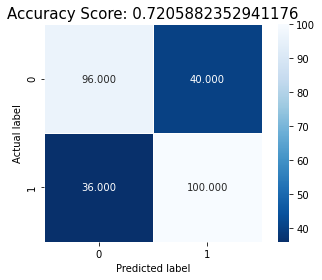

In [21]:
sns.heatmap(ConfusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [24]:
np.save('WeightsLogisticRegressionRunAll.npy' , weights)